[[1 3]
 [2 3]]
[1 2]
2
1.5


Text(0.5, 0, 'X')

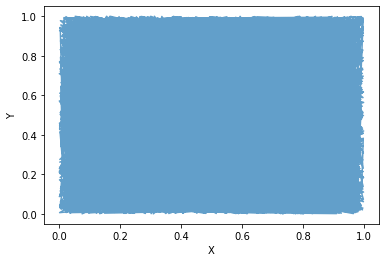

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

x = np.random.uniform(0, 1, 10000)
y = np.random.uniform(0, 1, 10000)

test = np.array([[1,3],[2,3]])
print(test)
print(test[:,0])
shape = np.shape(test)
print(shape[1])
print(np.mean(test[:,0]))
#col1_x_mean = np.mean(test[1])

plt.plot(x, y, alpha = 0.7); plt.ylabel('Y'); plt.xlabel('X')

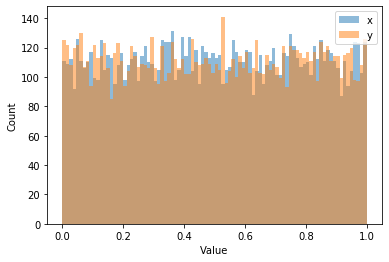

In [23]:
bins = np.linspace(0, 1, 10000)

plt.hist(x, 90, alpha = 0.5, label = 'x')
plt.hist(y, 90, alpha = 0.5, label = 'y')
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend(loc='upper right')

In [26]:
expected_value = 0.5 

x_mean = np.mean(x)
y_mean = np.mean(y)

print(x_mean)
print()
print(y_mean)

0.5011759618054125

0.4988538471893663


In [ ]:
def rmse(arr):
    shape_arr = np.shape(arr)
    exact = 0.5
    if (shape[1] != 2):
        print("The function rmse only takes in an array of random points with size Nx2")
        return 
    else:
        x_mean = np.mean(arr[:,0])
        y_mean = np.mean(arr[:,1])
        
        calc_rmse = np.sqrt((x_mean - exact)**2 +(y_mean - exact )**2)